# AfterWork Data Science: Data Visualisation with Matplotlib

## 1. Defining the Question

### a) Specifying the Data Analysis Question

Specify the reasearch question that you'll be answering.

Recommendations on the kinds of movies Mima startup should
create in order to have a profitable business.


### b) Defining the Metric for Success

Profitability of Mima based on the movies recommended

### c) Understanding the context 

Mima is a startup film company that aims to enter the film industry.
As a data scientist consultant working for the startup, you're required to perform an
analysis and provide recommendations on the kinds of movies that the startup should
create in order to have a profitable business.




### d) Recording the Experimental Design

Load libraries and datasets.

Select the most appropriate variables to work with.

Find and deal with duplicated data.

Find and deal with missing values.

Drop data that does not match

Perform Data analysis to answer questions

Plot variables to get relationships

### e) Data Relevance

The data provided was relevant

## 2. Reading the Data

In [ ]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [ ]:
# Loading the dataset
# --- 
# Dataset url = http://bit.ly/MoviesDS
# --- 
# 
df = pd.read_csv('http://bit.ly/MoviesDS')
df.head()

In [ ]:
# Determining the size 
# ---
#
df.shape

(10866, 21)

In [ ]:
# Checking the datatypes
# ---
# 
df.dtypes

In [ ]:
# Statistical summary
# ---
#
df.describe()

In [ ]:
# Checking for missing values 
# ---
# 
df.isnull().sum()

## 3. External Data Source Validation

https://www.themoviedb.org/

## 4. Data Preparation

In [ ]:
# Dropping irrelevant columns
# ---
#
df.drop(['id','imdb_id', 'homepage', 'overview'], axis=1, inplace=True)

In [ ]:
# Handling missing data
# ---
# 
df['cast'].fillna('missing', inplace=True )
df['director'].fillna('missing', inplace=True)
df['tagline'].fillna('missing', inplace=True)
df['keywords'].fillna('missing', inplace=True)
df['genres'].fillna('missing', inplace=True)
df['production_companies'].fillna('missing', inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 

In [ ]:
# Previewing the outcome
# ---
# 
df.isnull().sum()

NameError: ignored

In [ ]:
# Checking for duplicates 
# ---
#
df.duplicated().sum()

In [ ]:
# Dropping the duplicates 
# ---
#
df.drop_duplicates(inplace = True) 

# Checking for duplicates for comfirmation
# ---
#
df.duplicated().sum()

0


## 5. Solution Implementation

Here we investigate the questions that would help craft our recommendations.

### 5.a) Questions

#### **Question 1**: Do movies with a higher budget end up being popular?

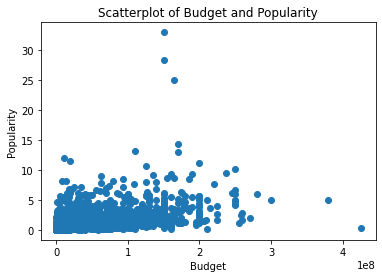

In [ ]:
# Question 1
# ---
# Do movies with a higher budget end up being popular?
# ---
#

# Create a scatter plot to determine relationship between budget and the popularity
budget = df['budget']
popularity = df['popularity']

# Render 
plt.scatter(budget, popularity)

# Tweak & Label 
plt.title('Scatterplot of Budget and Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')

# Display
plt.show()

#Movies with a higher budget do not necessarily end up being popular


In [ ]:
df.head()

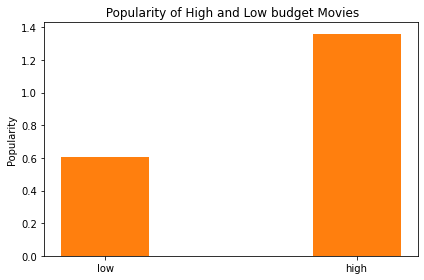

In [ ]:
# Create a bar chart to compare low budget movies with high budget movies
# ---
# 

# create two groups (low and high budget movies) using the median
m = df['budget'].median()
low_budget =  df.query('budget < {}'.format(m))
high_budget =  df.query('budget >= {}'.format(m))

# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']


x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, heights, width)
rects2 = ax.bar(x, heights, width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Popularity')
ax.set_title(' Popularity of High and Low budget Movies')
ax.set_xticks(x)
ax.set_xticklabels(labels)




fig.tight_layout()

plt.show()



In [ ]:
mean_popularity_of_high_budget

1.3628148991660343

In [ ]:
# Percentage difference
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

**Question 2:** Does the length of the movie affect the vote count and popularity?

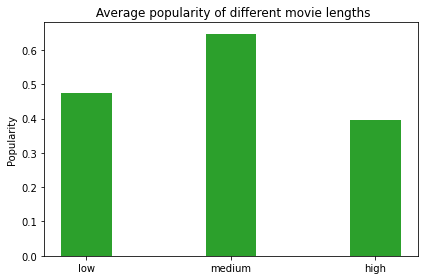

In [ ]:
# Question 2
# ---
# Does the length of the movie affect the vote count and popularity?
# ---
# 

# Create 3 movie groups:  <60 min: short, 60 min <=  <= - 120 min: medium,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
longer = df.query('runtime > {}'.format(200))

# Check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = longer['popularity'].mean()

# Create a bar chart of average popularity of different movie lengths
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','high']



x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rect1 = ax.bar(x, heights, width)
rect2 = ax.bar(x, heights, width)
rect3 = ax.bar(x, heights, width)



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Popularity')
ax.set_title(' Average popularity of different movie lengths')
ax.set_xticks(x)
ax.set_xticklabels(labels)




fig.tight_layout()

plt.show()



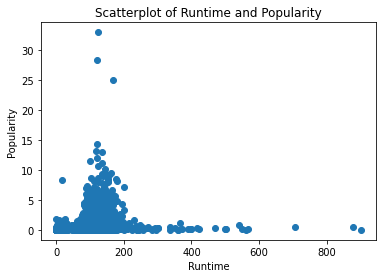

In [ ]:
# Create a scatterplot to determine the relation between runtime and popularity 
# ---
# 
runtime = df['runtime']
popularity = df['popularity'] 

# Render 
plt.scatter(runtime, popularity)

# Tweak & Label 
plt.title('Scatterplot of Runtime and Popularity')
plt.xlabel('Runtime')
plt.ylabel('Popularity')

# Display
plt.show()


**Question 3:** Does higher popularity mean higher profits?

[Text(0, 0, 'low'), Text(0, 0, 'high')]

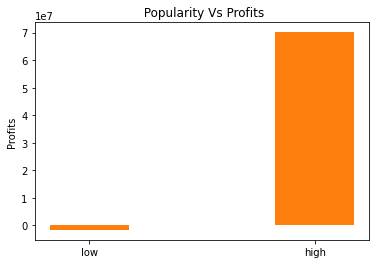

In [ ]:
# Question 3
# ---
# Does higher popularity mean higher profits?
# ---
#

# Getting the mean of popularity 
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

# Creating a new column called profit (profit = revenue - budget)
df['profit'] = df['revenue'] - df['budget']
df = df.dropna(axis = 0, how ='any')

# Calculating the average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']

# YOUR CODE GOES BELOW HERE
x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rect5 = ax.bar(x, heights, width)
rect6 = ax.bar(x, heights, width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profits')
ax.set_title(' Popularity Vs Profits')
ax.set_xticks(x)
ax.set_xticklabels(labels)



In [ ]:
df.isnull().sum()

**Question 4:** What features are associated with the top 10 revenue movies?

In [ ]:
# Question 4
# ---
# What features are associated with the top 10 revenue movies?
# ---
#
#import seaborn as sns
#sns.pairplot(df)

# Display
#plt.show()
Top10revenue= df.sort_values(by='revenue', ascending=0)
Top10revenue.head(10)




In [ ]:
# Question 5
# ---
# Which genres are most popular from year to year?

genre_df=df.groupby(['genres']).mean()
genre_df.sort_values(by='popularity', ascending=0)





**Question 5:** Which genres are most popular from year to year?

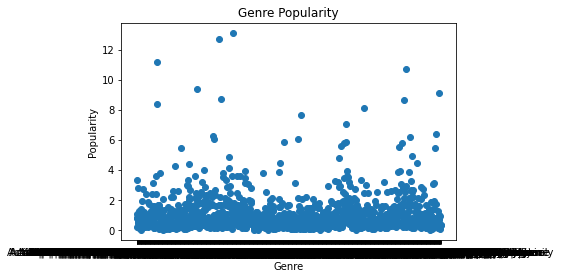

In [ ]:
# Question 5
# ---
# Which genres are most popular from year to year?
# ---
#
genre_df=df.groupby(['genres']).mean().reset_index()

genre_df.sort_values(by='popularity', ascending=0)

genree = genre_df['genres']
popularity = genre_df['popularity']

# Render 
plt.scatter(genree, popularity)

# Tweak & Label 
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity')

# Display
plt.show()


### 5.b) Recommendations

From the above analysis, below are our recommendations:

1. Movies with a higher budget do not necessarily end up being popular

2. Medium movie lengths are most popular

3. High popularity means high profits

4. Top 10 revenue movies have a vote_average of higher than 6.5 and  most were released after 2009

5. Adventure|Science Fiction|Thriller is the most popular genre on average year on year







## 6. Challenging your Solution

## 7. Follow up questions

During this step, you rethink and propose other ways that you can improve your solution.

We had the right data

### b). Do we need other data to answer our question?

### c). Did we have the right question?

Yes